In [1]:
import tensorflow as tf
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

C:\Users\MAIN\Anaconda3\envs\kaggle\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\MAIN\Anaconda3\envs\kaggle\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\MAIN\Anaconda3\envs\kaggle\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\MAIN\Anaconda3\envs\kaggle\lib\site-packages\tensorflow\python\f

In [2]:
# 3D 데이터셋 만들기
np.random.seed(42)
m = 200
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
data = np.empty((m,3))
data[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
data[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) /2
data[:, 2] = data[:, 0] * w1 + data[:, 1] * w2 + noise * np.random.randn(m)

# 데이터 정규화
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(data[:100])

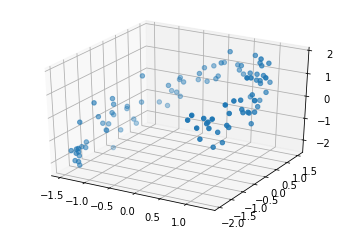

In [3]:
# 원본 데이터(X_train) 시각화
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_train[:,0], X_train[:,1], X_train[:,2])

In [4]:
## layer parameters
n_inputs = 3
n_hidden = 2
n_outputs = n_inputs # 오토인코더: input,output 크기가 같다.

## autoencoder
X = tf.placeholder(tf.float32, shape=[None, n_inputs])
hidden = tf.layers.dense(X, n_hidden, activation=None)
outputs = tf.layers.dense(hidden, n_outputs)


## train parameters
learning_rate = 0.01
n_epochs = 1000
pca = hidden

## loss
reconstruction_loss = tf.reduce_mean(tf.square(outputs-X)) # MSE

## optimizer
train_op = tf.train.AdamOptimizer(learning_rate).minimize(reconstruction_loss)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(n_epochs):
        _, _loss = sess.run([train_op, reconstruction_loss], feed_dict={X: X_train})
        print(f'loss: {_loss:.5f}')
    pca_val = sess.run(pca, feed_dict={X: X_train})
    res = sess.run(outputs, feed_dict={X: X_train})

W0825 23:05:21.431609 22172 deprecation.py:323] From <ipython-input-4-af679c9e82e8>:8: dense (from tensorflow.python.layers.core) is deprecated and will be removed in a future version.
Instructions for updating:
Use keras.layers.dense instead.
W0825 23:05:21.434608 22172 deprecation.py:506] From C:\Users\MAIN\Anaconda3\envs\kaggle\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


loss: 1.64014
loss: 1.55797
loss: 1.48192
loss: 1.41106
loss: 1.34607
loss: 1.28630
loss: 1.23134
loss: 1.18107
loss: 1.13520
loss: 1.09324
loss: 1.05470
loss: 1.01919
loss: 0.98635
loss: 0.95581
loss: 0.92717
loss: 0.90005
loss: 0.87419
loss: 0.84938
loss: 0.82543
loss: 0.80218
loss: 0.77948
loss: 0.75722
loss: 0.73533
loss: 0.71379
loss: 0.69255
loss: 0.67157
loss: 0.65082
loss: 0.63029
loss: 0.60999
loss: 0.58991
loss: 0.57005
loss: 0.55041
loss: 0.53099
loss: 0.51180
loss: 0.49285
loss: 0.47415
loss: 0.45570
loss: 0.43751
loss: 0.41960
loss: 0.40201
loss: 0.38473
loss: 0.36780
loss: 0.35124
loss: 0.33509
loss: 0.31937
loss: 0.30411
loss: 0.28934
loss: 0.27508
loss: 0.26138
loss: 0.24824
loss: 0.23570
loss: 0.22376
loss: 0.21244
loss: 0.20173
loss: 0.19166
loss: 0.18221
loss: 0.17336
loss: 0.16512
loss: 0.15747
loss: 0.15038
loss: 0.14384
loss: 0.13781
loss: 0.13228
loss: 0.12721
loss: 0.12257
loss: 0.11834
loss: 0.11448
loss: 0.11097
loss: 0.10777
loss: 0.10485
loss: 0.10219
loss: 

loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 0.05927
loss: 

pca_val.shape : (100, 2)


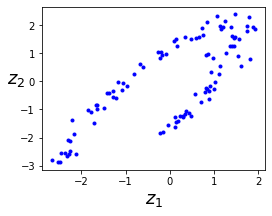

In [5]:
fig = plt.figure(figsize=(4,3))
plt.plot(pca_val[:,0], pca_val[:, 1], "b.")
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
print('pca_val.shape :', pca_val.shape) # 차원 축소 된것 확인.
plt.show()

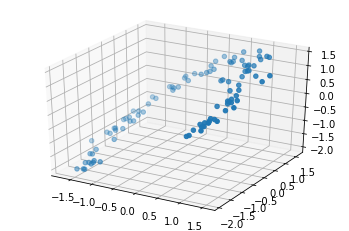

In [6]:
# 오토인코더로 디코딩된 데이터 시각화
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(res[:,0], res[:,1], res[:,2])